In [33]:
# Get some stats on the SRA's parsed

#Workflow:
# Query hymenoptera + only RNA datasets
# map reads of Accession against the non-redundant eukaryotic viruses retrieved in notebook 2.
# If sum of mapped reads > 100000: retain the accession 
# skesa assemble the surviving accessions.
# collapse all retrieved contigs on 97% - 80%cov (cdhit)
# 1333 surviving, and 1 of the accessions was not downloadable. ()

#Keep in mind this notebook uses data generated in 'taxonomy_graphs_sradata.ipynb'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#sns.set(font='arial')
#sns.set_style("white")
#sns.set_style("ticks")
%matplotlib inline

In [4]:
sra_map = pd.read_csv('../data/SRA_df.tsv', sep='\t', index_col=0, header=0)
sra_map = sra_map.T
sra_map = sra_map[sra_map.sum(axis=1) > 100000]
# Remove contamination.
del sra_map['BeeP-25-2013_NODE_2878_length_686_cov_8_561576']
del sra_map['BeeP-25-2013_NODE_7671_length_511_cov_8_142857']
del sra_map['BeeP-35-2013_NODE_6003_length_514_cov_1_240275']
#Log transform:
for c in sra_map.columns:
    sra_map[c] = np.log10(sra_map[c] + 1)

/Users/deboutte/miniconda3/envs/Bee_euvir/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


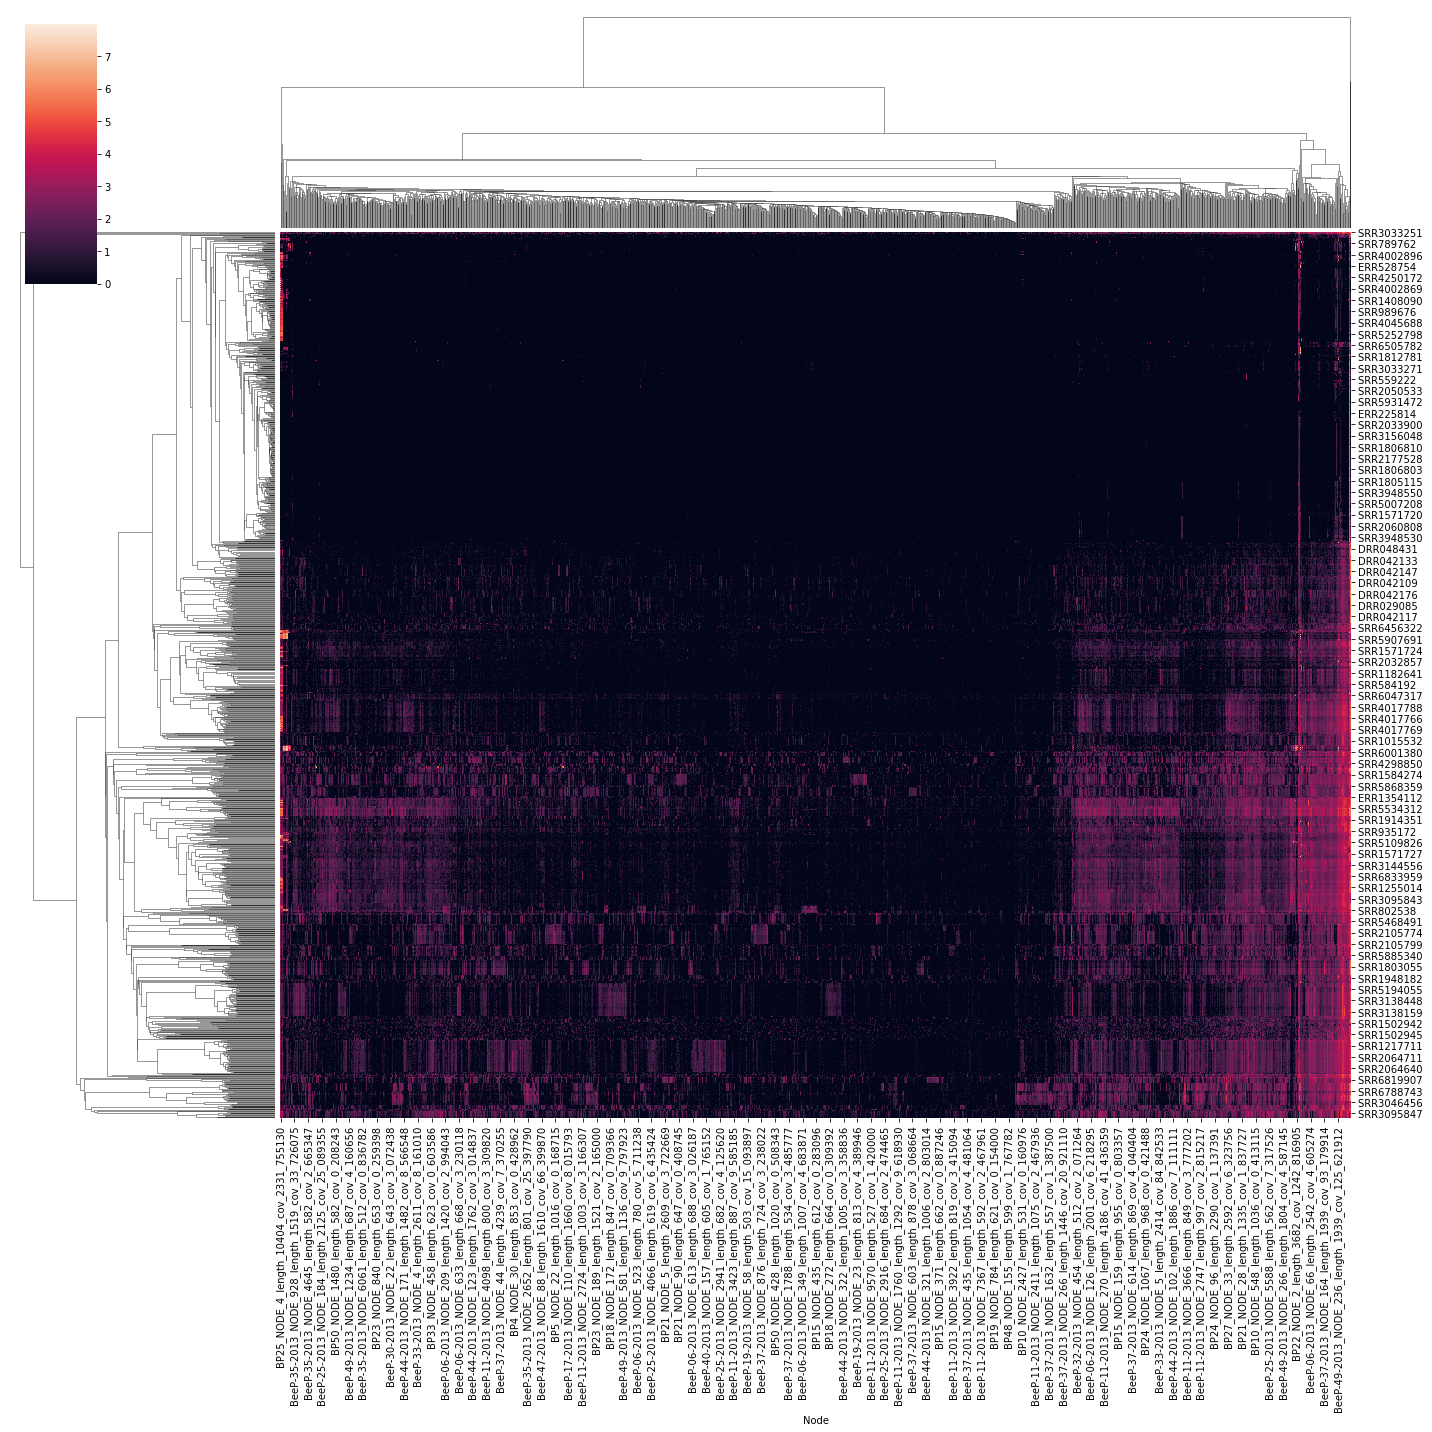

In [5]:
#entire dataframe.
g = sns.clustermap(sra_map, figsize=(20,20))
g
#g.savefig('figures/SRA_mapping_heatmap.png', dpi=300)

In [7]:
# Sanity check (We missing any samples ?).
virus_sras = []
for i in list(sra_map.index):
    virus_sras.append(i.replace(" ",""))
assembledsras = []
with open('../data/SRA_acclist_assembled.txt') as f:
    for line in f:
        assembledsras.append(line.strip())
for i in assembledsras:
    if i not in virus_sras:
        print(i)

In [8]:
#Collapse of order.
#Read in taxonomical information (from notebook 1)
namedf = pd.read_csv("../data/notebooks_out/viral_df_taxonomy.csv", index_col=0)

contigs_to_assign = list(sra_map.columns)
len(contigs_to_assign)
unclassified = []
for i in namedf.index:
    if i not in contigs_to_assign:
        unclassified.append(i)
namedf = namedf[~namedf.index.isin(unclassified)]
namedf = namedf[namedf.index.isin(contigs_to_assign)]
for i in namedf['family'].unique():
    print(i)
unclassified = unclassified + list(namedf[namedf['family'] == 'Unclassified'].index)

Alphaflexiviridae
Circoviridae
Tymoviridae
Unclassified
Genomoviridae
Parvoviridae
Dicistroviridae
Rhabdoviridae
Picobirnaviridae
Partitiviridae
Retroviridae
Reoviridae
Iflaviridae
Iridoviridae
Totiviridae
Chrysoviridae
Virgaviridae
Comoviridae
Phycodnaviridae
Cruciviridae
Bidnaviridae
Orthomyxoviridae
Endornaviridae
Solemoviridae
Permutotetraviridae
Marnaviridae
Deltaflexiviridae
Tombusviridae
Geminiviridae
Bacilladnaviridae
Bromoviridae
Nodaviridae
Polycipiviridae
Betaflexiviridae
Nudiviridae
Phenuiviridae
Astroviridae


In [9]:
Alphaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Alphaflexiviridae'].index))].max(axis=1)
Circoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Circoviridae'].index))].max(axis=1)
Tymoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Tymoviridae'].index))].max(axis=1)
Genomoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Genomoviridae'].index))].max(axis=1)
Parvoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Parvoviridae'].index))].max(axis=1)
Dicistroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Dicistroviridae'].index))].max(axis=1)
Rhabdoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Rhabdoviridae'].index))].max(axis=1)
Picobirnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Picobirnaviridae'].index))].max(axis=1)
Partitiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Partitiviridae'].index))].max(axis=1)
Retroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Retroviridae'].index))].max(axis=1)
Reoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Reoviridae'].index))].max(axis=1)
Iflaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Iflaviridae'].index))].max(axis=1)
Iridoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Iridoviridae'].index))].max(axis=1)
Totiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Totiviridae'].index))].max(axis=1)
Chrysoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Chrysoviridae'].index))].max(axis=1)
Virgaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Virgaviridae'].index))].max(axis=1)
Comoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Comoviridae'].index))].max(axis=1)
Phycodnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Phycodnaviridae'].index))].max(axis=1)
Cruciviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Cruciviridae'].index))].max(axis=1)
Bidnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bidnaviridae'].index))].max(axis=1)
Orthomyxoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Orthomyxoviridae'].index))].max(axis=1)
Endornaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Endornaviridae'].index))].max(axis=1)
Solemoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Solemoviridae'].index))].max(axis=1)
Permutotetraviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Permutotetraviridae'].index))].max(axis=1)
Marnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Marnaviridae'].index))].max(axis=1)
Deltaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Deltaflexiviridae'].index))].max(axis=1)
Tombusviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Tombusviridae'].index))].max(axis=1)
Geminiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Geminiviridae'].index))].max(axis=1)
Bacilladnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bacilladnaviridae'].index))].max(axis=1)
Bromoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bromoviridae'].index))].max(axis=1)
Nodaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Nodaviridae'].index))].max(axis=1)
Polycipiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Polycipiviridae'].index))].max(axis=1)
Betaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Betaflexiviridae'].index))].max(axis=1)
Nudiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Nudiviridae'].index))].max(axis=1)
Phenuiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Phenuiviridae'].index))].max(axis=1)
Astroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Astroviridae'].index))].max(axis=1)
Unclassified = sra_map[sra_map.columns.intersection(unclassified)].max(axis=1)

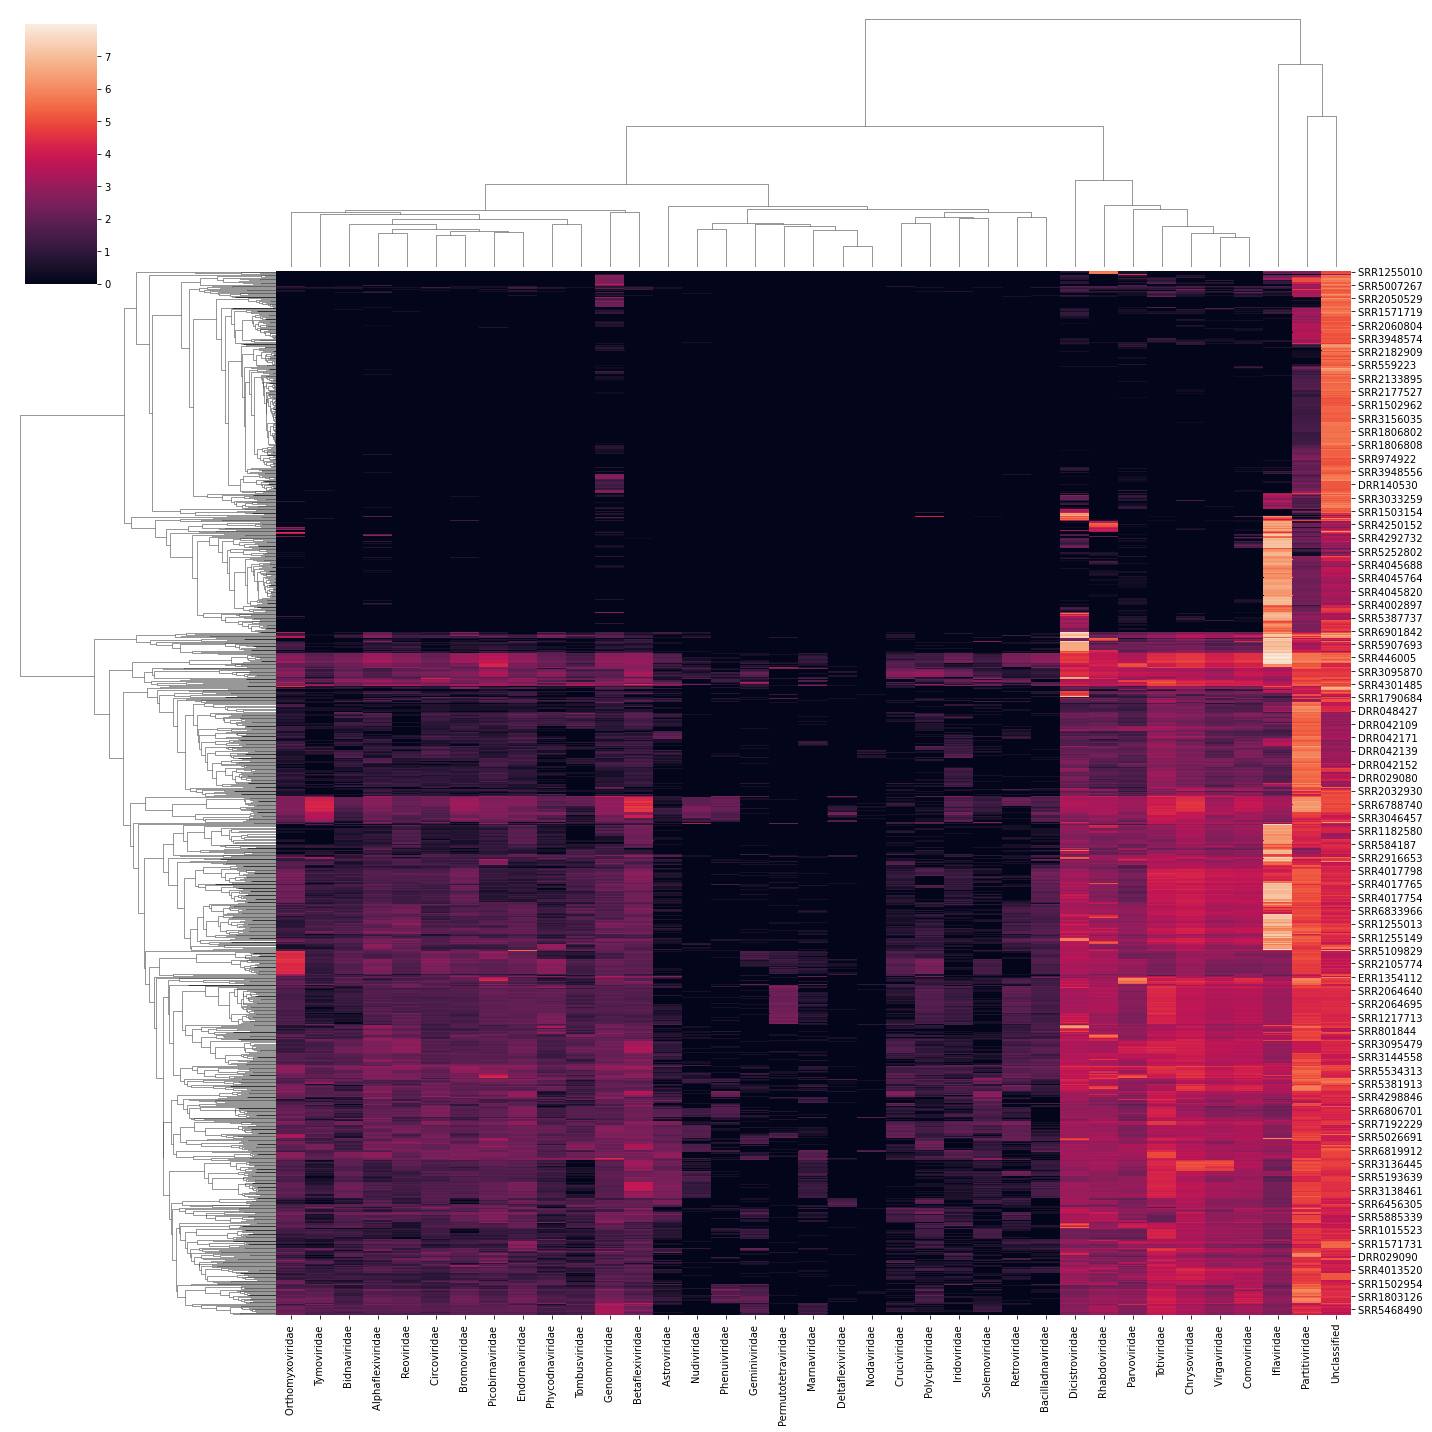

In [10]:
#Maximum value for collapse.

sra_famdf = pd.concat([Alphaflexiviridae ,Circoviridae ,Tymoviridae ,Genomoviridae ,Parvoviridae ,Dicistroviridae ,Rhabdoviridae ,Picobirnaviridae ,Partitiviridae ,Retroviridae ,Reoviridae ,Iflaviridae ,Iridoviridae ,Totiviridae ,Chrysoviridae ,Virgaviridae ,Comoviridae ,Phycodnaviridae ,Cruciviridae ,Bidnaviridae ,Orthomyxoviridae ,Endornaviridae ,Solemoviridae ,Permutotetraviridae ,Marnaviridae ,Deltaflexiviridae ,Tombusviridae ,Geminiviridae ,Bacilladnaviridae ,Bromoviridae ,Nodaviridae ,Polycipiviridae ,Betaflexiviridae ,Nudiviridae ,Phenuiviridae ,Astroviridae ,Unclassified],axis=1)
sra_famdf.columns = ['Alphaflexiviridae ','Circoviridae ','Tymoviridae ','Genomoviridae ','Parvoviridae ','Dicistroviridae ','Rhabdoviridae ','Picobirnaviridae ','Partitiviridae ','Retroviridae ','Reoviridae ','Iflaviridae ','Iridoviridae ','Totiviridae ','Chrysoviridae ','Virgaviridae ','Comoviridae ','Phycodnaviridae ','Cruciviridae ','Bidnaviridae ','Orthomyxoviridae ','Endornaviridae ','Solemoviridae ','Permutotetraviridae ','Marnaviridae ','Deltaflexiviridae ','Tombusviridae ','Geminiviridae ','Bacilladnaviridae ','Bromoviridae ','Nodaviridae ','Polycipiviridae ','Betaflexiviridae ','Nudiviridae ','Phenuiviridae ','Astroviridae ','Unclassified']

g = sns.clustermap(sra_famdf,figsize=(20,20))
g
#g.savefig('figures/SRA_mapping_heatmap_FamilyMAX.png', dpi=300)

In [11]:
Alphaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Alphaflexiviridae'].index))].median(axis=1)
Circoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Circoviridae'].index))].median(axis=1)
Tymoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Tymoviridae'].index))].median(axis=1)
Genomoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Genomoviridae'].index))].median(axis=1)
Parvoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Parvoviridae'].index))].median(axis=1)
Dicistroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Dicistroviridae'].index))].median(axis=1)
Rhabdoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Rhabdoviridae'].index))].median(axis=1)
Picobirnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Picobirnaviridae'].index))].median(axis=1)
Partitiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Partitiviridae'].index))].median(axis=1)
Retroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Retroviridae'].index))].median(axis=1)
Reoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Reoviridae'].index))].median(axis=1)
Iflaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Iflaviridae'].index))].median(axis=1)
Iridoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Iridoviridae'].index))].median(axis=1)
Totiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Totiviridae'].index))].median(axis=1)
Chrysoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Chrysoviridae'].index))].median(axis=1)
Virgaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Virgaviridae'].index))].median(axis=1)
Comoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Comoviridae'].index))].median(axis=1)
Phycodnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Phycodnaviridae'].index))].median(axis=1)
Cruciviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Cruciviridae'].index))].median(axis=1)
Bidnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bidnaviridae'].index))].median(axis=1)
Orthomyxoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Orthomyxoviridae'].index))].median(axis=1)
Endornaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Endornaviridae'].index))].median(axis=1)
Solemoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Solemoviridae'].index))].median(axis=1)
Permutotetraviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Permutotetraviridae'].index))].median(axis=1)
Marnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Marnaviridae'].index))].median(axis=1)
Deltaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Deltaflexiviridae'].index))].median(axis=1)
Tombusviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Tombusviridae'].index))].median(axis=1)
Geminiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Geminiviridae'].index))].median(axis=1)
Bacilladnaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bacilladnaviridae'].index))].median(axis=1)
Bromoviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Bromoviridae'].index))].median(axis=1)
Nodaviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Nodaviridae'].index))].median(axis=1)
Polycipiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Polycipiviridae'].index))].median(axis=1)
Betaflexiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Betaflexiviridae'].index))].median(axis=1)
Nudiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Nudiviridae'].index))].median(axis=1)
Phenuiviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Phenuiviridae'].index))].median(axis=1)
Astroviridae = sra_map[sra_map.columns.intersection(list(namedf[namedf['family'] == 'Astroviridae'].index))].median(axis=1)
Unclassified = sra_map[sra_map.columns.intersection(unclassified)].median(axis=1)

/Users/deboutte/miniconda3/envs/Bee_euvir/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


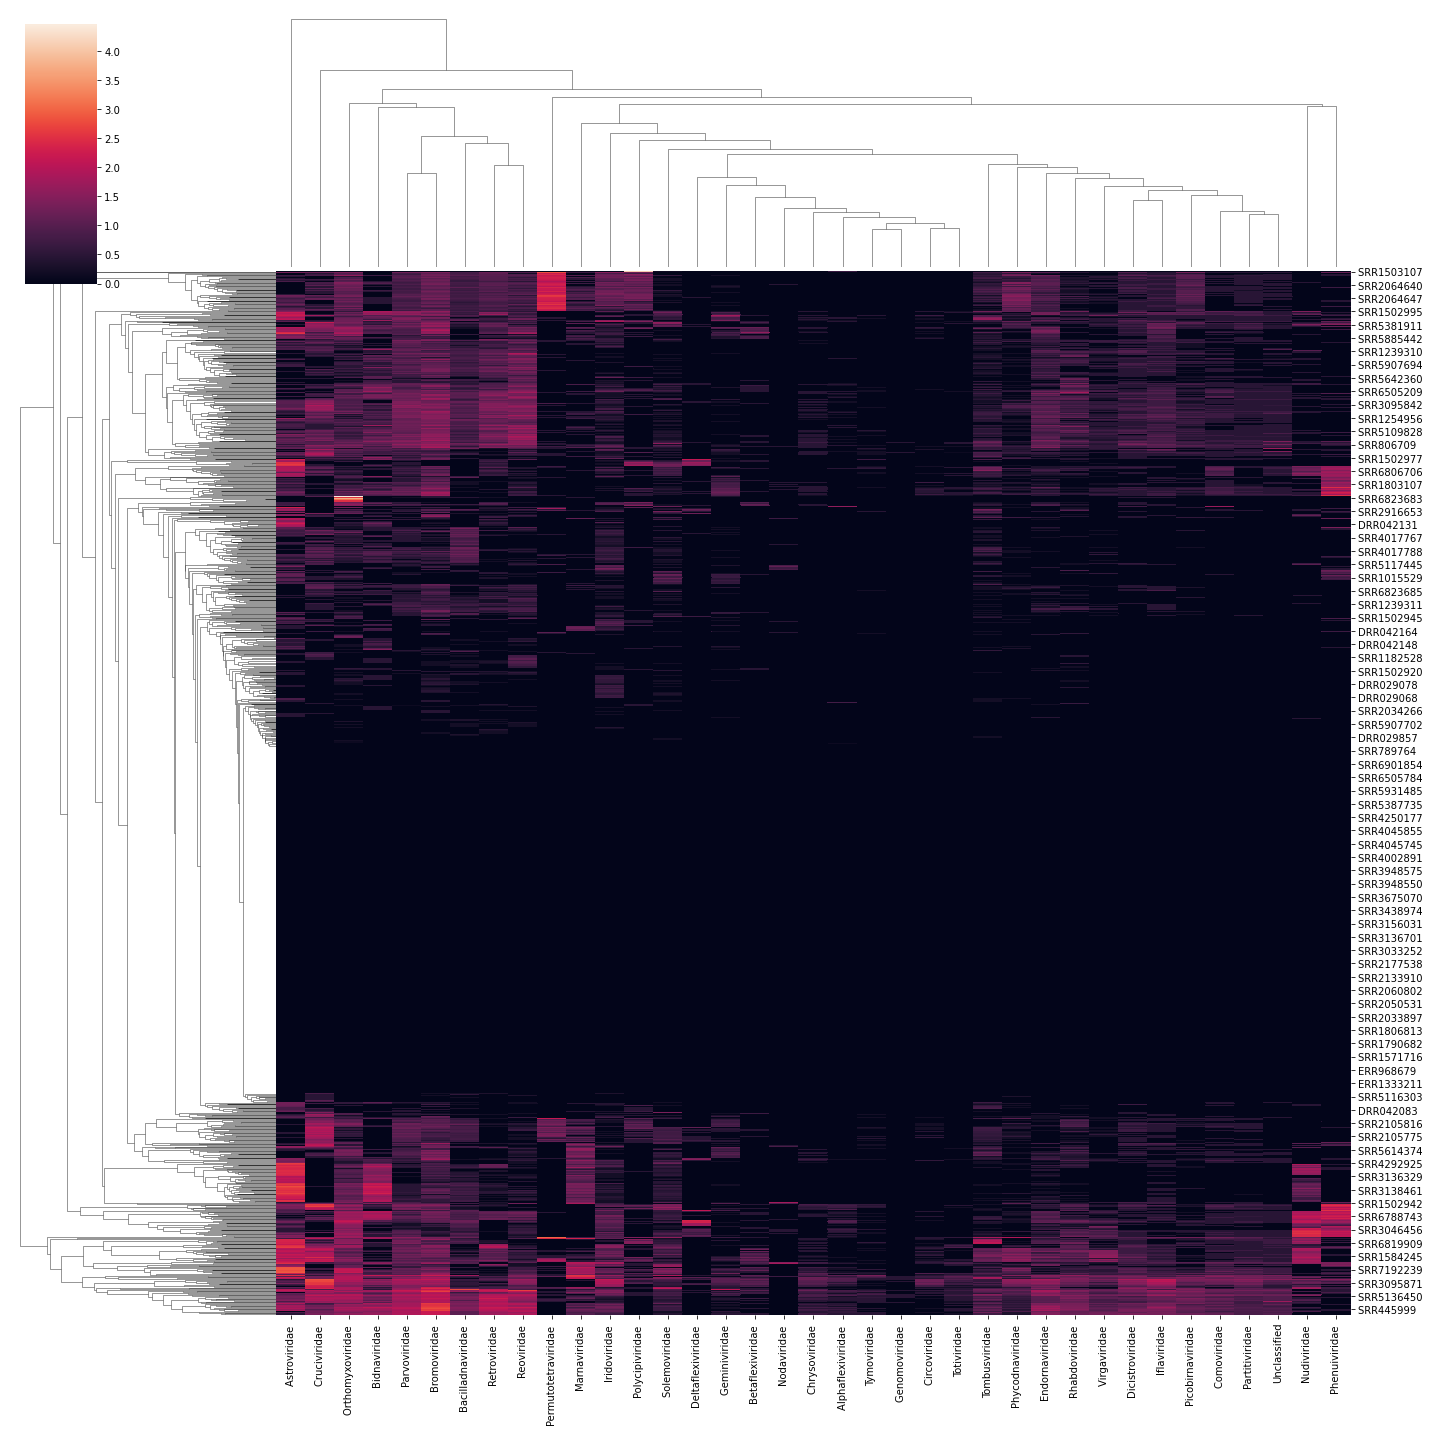

In [12]:
#Median value for collapse.
sra_famdf = pd.concat([Alphaflexiviridae ,Circoviridae ,Tymoviridae ,Genomoviridae ,Parvoviridae ,Dicistroviridae ,Rhabdoviridae ,Picobirnaviridae ,Partitiviridae ,Retroviridae ,Reoviridae ,Iflaviridae ,Iridoviridae ,Totiviridae ,Chrysoviridae ,Virgaviridae ,Comoviridae ,Phycodnaviridae ,Cruciviridae ,Bidnaviridae ,Orthomyxoviridae ,Endornaviridae ,Solemoviridae ,Permutotetraviridae ,Marnaviridae ,Deltaflexiviridae ,Tombusviridae ,Geminiviridae ,Bacilladnaviridae ,Bromoviridae ,Nodaviridae ,Polycipiviridae ,Betaflexiviridae ,Nudiviridae ,Phenuiviridae ,Astroviridae ,Unclassified],axis=1)
sra_famdf.columns = ['Alphaflexiviridae ','Circoviridae ','Tymoviridae ','Genomoviridae ','Parvoviridae ','Dicistroviridae ','Rhabdoviridae ','Picobirnaviridae ','Partitiviridae ','Retroviridae ','Reoviridae ','Iflaviridae ','Iridoviridae ','Totiviridae ','Chrysoviridae ','Virgaviridae ','Comoviridae ','Phycodnaviridae ','Cruciviridae ','Bidnaviridae ','Orthomyxoviridae ','Endornaviridae ','Solemoviridae ','Permutotetraviridae ','Marnaviridae ','Deltaflexiviridae ','Tombusviridae ','Geminiviridae ','Bacilladnaviridae ','Bromoviridae ','Nodaviridae ','Polycipiviridae ','Betaflexiviridae ','Nudiviridae ','Phenuiviridae ','Astroviridae ','Unclassified']
sns.clustermap(sra_famdf,figsize=(20,20))